#Pergunta fundamental de hoje

Podemos escrever programas não-determinísticos?

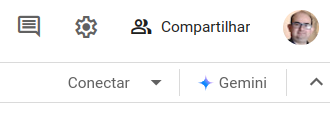

#Determinismo vs Não-determinismo

* **Probabilidade epistêmica**: quando atribuímos uma probabilidade apenas por falta de informação
* **Probabilidade ontológica**: quando há verdadeiro não-determinismo no universo

Posições acerca do determinismo no nível microscópico
* Determinismo
 * "Todo efeito tem uma causa"
 * Usamos probabilidade de forma epistêmica apenas
* Não-determinismo causal
 * “Perda de causalidade”: há verdadeiros eventos sem causa, i.e., que ocorrem espontaneamente
 * Probabilidade é ontológica
 * Determinismo estatístico: na Física Quântica não fazemos previsões individuais, mas pode-se fazer previsões precisas sobre as frequências estatísticas dos diferentes resultados
* Não-determinismo preditivo
 * Variáveis escondidas
 * Usamos probabilidade de forma epistêmica apenas
* A questão permanece em aberto
* [Um pouco mais sobre a questão](http://opessoa.fflch.usp.br/sites/opessoa.fflch.usp.br/files/FiFi-17-Cap14.pdf)

# Programas estocásticos


* No nível macroscópico, o determinismo parece funcionar bem
 * Mas são tantas as variáveis a controlar que sujeitamos as flutuações a uma probabilidade (um erro aleatório)
* Os fenômenos são modelados como **processos estocásticos**
  * do grego stokhastikos, "capaz de adivinhar"
  * O próximo estado depende do estado anterior e algum elemento aleatório
  * Ex: lançar uma moeda, número de pessoas na fila ao longo do dia, ciclo de chuvas...
* Programas estocásticos
  * Programas, em geral, são determinísticos (mesma saída, para mesma entrada)
   * Nem todos os problemas podem ser solucionados por modelos determinísticos
  * Programa estocástico modela um processo estocástico por meio do computador

## Experimento #1

O código abaixo modela um processo estocástico onde lançamos um dado cinco vezes. A saída da função ```jogarDado()``` modela o resultado da rolagem de um dado, enquanto a função ```testeJogadas()``` modela a rolagem de um número específico de dados.



In [ ]:
import random

def jogarDado():
    """retorna um inteiro aleatório entre 1 e 6"""
    return random.choice([1,2,3,4,5,6])
    #se eu quisesse simular uma moeda faria
    #random.choice(["H","T"])

def testeJogadas(n = 10):
    result = ''
    for i in range(n):
        result = result + str(jogarDado())
    print(result)

testeJogadas(5)
testeJogadas(5)

42432
34611


Considerando ```testeJogadas(5)``` qual resultado é mais surpreendente: 11111 ou 54424?


## Existe verdadeira aleatoriedade no computador?

* Do jeito que usamos, não!
* O computador gera **números pseudo-aleatórios**
* Resultados são obtidos a partir de um algoritmo determinístico que atua sobre uma <u>semente</u>
* Se não for configurada, a semente é escolhida a partir do relógio, tornando-se aparentemente aleatório
* Para verdadeira aleatoriedade procure outras alternativas
 * https://www.random.org/
 * https://qrng.anu.edu.au/

### Experimento #1 (de novo, agora com semente)

In [ ]:
import random

def jogarDado():
    """retorna um inteiro aleatório entre 1 e 6"""
    return random.choice([1,2,3,4,5,6])
    #se eu quisesse simular uma moeda faria
    #random.choice(["H","T"])

def testeJogadas(n = 10):
    result = ''
    for i in range(n):
        result = result + str(jogarDado())
    print(result)

#Adicionamos uma semente (um valor qualquer)
random.seed(42415351)
testeJogadas(5)
testeJogadas(5)
print(jogarDado())
random.seed(42415351)
testeJogadas(5)
print(jogarDado())
testeJogadas(5)

42211
56451
1
42211
5
64511


#Fatos sobre probabilidade

* Probabilidades são sempre no intervalo entre 0 e 1. 0 é impossível e 1 é garantido.
* Se a probabilidade de um **evento** ocorrer é $p$, a probabilidade dele não ocorrer é $1-p$
* Quando eventos são **independentes**, a probabilidade de todos acontecerem é igual aos produtos das probabilidades de cada evento ocorrer
 * São independentes dois eventos cujos **resultados** não têm influência um sobre o outro

$P(\text{sair 1 em um dado}) = \frac{1}{6}$

$P(\text{sair 11 em dois dados}) = ?$

Como os eventos são independentes, podemos fazer:

$P(\text{sair 11 em dois dados}) = \frac{1}{6} \times \frac{1}{6} = \frac{1}{36}$

$P(\text{sair 54 em dois dados}) = \frac{1}{6} \times \frac{1}{6} = \frac{1}{36}$

## Como atribuir probabilidade aos eventos?

* **Teoricamente**: assumimos certas condições (ex: experimento aleatório, resultados equiprováveis etc) dos resultados possíveis e vemos o número de resultados favoráveis ao evento de interesse. Ex: determinar a probabilidades com dados.
* **Experimentalmente**: realizamos experimentos e observamos a frequência de ocorrência do evento sob estudo. É uma importante parte da estatística. Ex: Qual a probabilidade de um indivíduo infectado, infectar outro indivíduo?
* **Subjetivamente**: usado quando não é viável determinar a probabilidade pela via experimental ou analítica. Ex: Qual a probabilidade de ocorrer uma Terceira Guerra Mundial?

# Simulando dados

##Experimento #2

* Qual a probabilidade de obter o resultado 11111 em ```testeJogadas(5)```?
  * Estimativa analítica (calculemos)
  * Estimativa por simulação (função ```simularResultado()```)
  * Por quê não conseguimos obter?

$P(\text{sair 11111 em 5 dados}) = \frac{1}{6} \times \frac{1}{6} \times \frac{1}{6} \times \frac{1}{6} \times \frac{1}{6} = \frac{1}{7776}$

In [ ]:
1/(6**5)

0.0001286008230452675

In [ ]:
random.seed(10)

def simularResultado(resultado, numTentativas):
    print("Resultado buscado: "+resultado)
    total = 0.0
    for i in range(numTentativas):
        dados = ''
        for j in range(len(resultado)):
            dados += str(jogarDado())
        if dados == resultado:
            total += 1
    print('Probabilidade analítica =',
          round(1/(6**len(resultado)), 8))
    estProb = round(total/numTentativas, 8)
    print('Probabilidade estimada  =',
          round(estProb, 8))

simularResultado('11111', 100000)
simularResultado('54424', 100000)

Resultado buscado: 11111
Probabilidade analítica = 0.0001286
Probabilidade estimada  = 0.00021
Resultado buscado: 54424
Probabilidade analítica = 0.0001286
Probabilidade estimada  = 0.00011


* Eventos raros
 * Uma pequena amostra pode nos enganar acerca da frequência real deste evento
 * Executemos o código com ```random.seed(10)```

[2021.4]

 **Perguntas relacionadas**
 * Juntar dados para analise de eventos quase impossíveis - ELIAN RODRIGUES

## Experimento #3

* Qual a probabilidade de obtermos um duplo seis em dois dados?
 * Estimativa analítica (calculemos)
 * Estimativa por simulação (função ```prob66()```)

Os resultados são independentes

$P(\text{obter duplo 6 em 2 dados}) = \frac{1}{6} \times \frac{1}{6} = \frac{1}{36}$

In [ ]:
1/36

0.027777777777777776

In [ ]:
def prob66(N):
    num66 = 0.0
    for i in range(N):
        if jogarDado() == 6 and jogarDado() == 6:
            num66 += 1
    return num66/N

print('Frequência de duplo seis =', str(prob66(100)*100) + '%')

Frequência de duplo seis = 5.0%


* Esta probabilidade é igual à probabilidade analítica?
* A probabilidade que obtivemos é de uma amostra, que converge ao valor analítico quando $N \rightarrow \infty$

## Experimento #4

* Qual a probabilidade de obtermos duas caras em duas moedas?
 * Estimativa analítica (calculemos)
 * Estimativa por simulação (função ```probHH()```)

Os resultados são independentes

$P(\text{obter duas caras em duas moedas}) = \frac{1}{2} \times \frac{1}{2} = \frac{1}{4}$

In [ ]:
1/4

0.25

In [ ]:
def moeda():
  return random.choice(['H','T'])

def probHH(N):
    numH = 0.0
    for i in range(N):
        if moeda() == 'H' and moeda() == 'H':
            numH += 1
    return numH/N

print('Frequência de duas caras =', str(probHH(10000)*100) + '%')

Frequência de duas caras = 24.82%


* Esta probabilidade é igual à probabilidade analítica?
* A probabilidade que obtivemos é de uma amostra, que converge ao valor analítico quando $N \rightarrow \infty$

#Lições


* **Lição 1**: Precisamos de muitas tentativas para termos uma boa estimativa da frequência de um evento raro.
* **Lição 2**: Não se deve confundir a probabilidade de uma amostra com a probabilidade real
* **Lição 3**: Nos casos mostrados temos uma boa solução analítica. Mas nem sempre isso é possível. Por isso simulações são úteis.